In [2]:
from numpy.random import seed
#fixing numpy seed for reproducability
seed(123)

import tensorflow
#fixing tensorflow seed for reproducability
tensorflow.random.set_seed(321)

In [9]:
#importing all libraries that we will need
import os
import numpy as np
import itertools

import tensorflow as tf
import keras
from keras.datasets import cifar10 # importing the cifar-10 dataset

from keras.models import Sequential       #this part is required to define model
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

from sklearn.metrics import confusion_matrix

#for image exploration we need this
from IPython.display import display
from keras.preprocessing.image import array_to_img

from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

In [10]:
#This part is about loading the dataset as a tuple the dataset comes with 50'000 training and 10'000 test images
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

In [11]:
#seting up a constant for the label names
LABEL_NAMES = ['airplane', 'automobile','bird','cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [14]:
x_test.shape

(10000, 32, 32, 3)

In [15]:
x_train_all.shape

(50000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
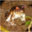

In [20]:
x_train_all[0]

In [21]:
#preprocessing the data
x_train_all =x_train_all / 255.0
x_test =  x_test / 255.0

In [30]:
#look at an image in the data after getting it into shape (between 0-1)
x_train_all[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [29]:
#look at the classes
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [31]:
#getting clases into one-hot encoding so they become a 10 element vector which is required for other process steps in categorization
y_cat_train_all = to_categorical(y_train_all,10)
y_cat_test = to_categorical(y_test,10)

In [32]:
#take a look at the classes again after converting
y_cat_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [33]:
#defining validation size variable as 10'000
VALIDATION_SIZE = 10000

#creating valiadtion set out of training set
x_val = x_train_all[:VALIDATION_SIZE]
y_val_cat = y_cat_train_all[:VALIDATION_SIZE]
x_val.shape

(10000, 32, 32, 3)

In [36]:
x_train = x_train_all[VALIDATION_SIZE:]
y_cat_train= y_cat_train_all[VALIDATION_SIZE:]

In [41]:
#printing out the dataset sizes to check
print("Training set shape:", x_train.shape)
print("Validation set shape:", x_val.shape)
print("Test set shape:", x_test.shape)

Training set shape: (40000, 32, 32, 3)
Validation set shape: (10000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


In [123]:
from tensorflow.keras.layers import Dropout

In [124]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 32 x 32 x 3 =3072 BEFORE FINAL LAYER
model.add(Flatten())

# DENSE HIDDEN LAYER
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# CLASSIFIER
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [125]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 227,146 (887.29 KB)

 Trainable params: 227,146 (887.29 KB)

 Non-trainable params: 0 (0.00 B)

In [126]:
#implementing early stop
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [127]:
#this part actually trains the model using the x_train and y_cat_train data for a maximum of 25 epochs.
#the model is evaluated on the x_val and y_val_cat data at the end of each epoch.
history = model.fit(x_train,y_cat_train,epochs=25,validation_data=(x_val,y_val_cat),callbacks=[early_stop])

Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 68s 52ms/step - accuracy: 0.2932 - loss: 1.8729 - val_accuracy: 0.5403 - val_loss: 1.2897
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.5314 - loss: 1.3108 - val_accuracy: 0.6101 - val_loss: 1.1179
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 89s 55ms/step - accuracy: 0.6049 - loss: 1.1258 - val_accuracy: 0.6384 - val_loss: 1.0136
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 76s 51ms/step - accuracy: 0.6508 - loss: 0.9997 - val_accuracy: 0.6744 - val_loss: 0.9362
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.6797 - loss: 0.9168 - val_accuracy: 0.6744 - val_loss: 0.9385
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 64s 51ms/step - accuracy: 0.7032 - loss: 0.8485 - val_accuracy: 0.6915 - val_loss: 0.8827
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - accuracy: 0.7195 - loss: 0.7925 - val_accuracy: 0.6934 - val_loss: 0.8923
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 52ms/step - accuracy: 0.7406 -

In [131]:
model.history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [132]:
#let's take a look at the metrics
metrics = pd.DataFrame(model.history.history)
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.390925,1.644505,0.5403,1.289696
1,0.550725,1.263623,0.6101,1.117908
2,0.614600,1.098588,0.6384,1.013616
3,0.653800,0.987134,0.6744,0.936166
4,0.680225,0.909059,0.6744,0.938490
5,0.705850,0.843025,0.6915,0.882653
6,0.719725,0.794361,0.6934,0.892295
7,0.737550,0.741623,0.7045,0.868618
8,0.750175,0.704063,0.7039,0.872729
9,0.759250,0.675249,0.7032,0.884120


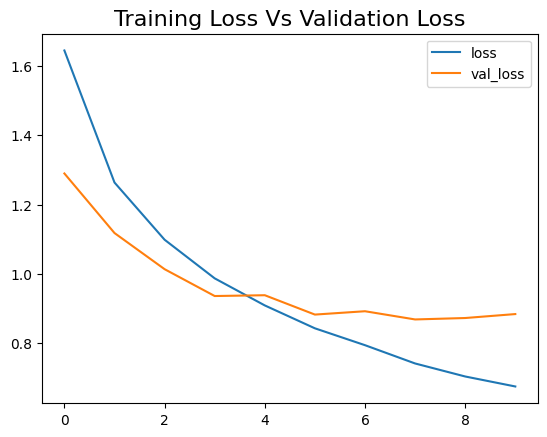

In [133]:
metrics[['loss', 'val_loss']].plot()
plt.title('Training Loss Vs Validation Loss', fontsize=16)
plt.show()

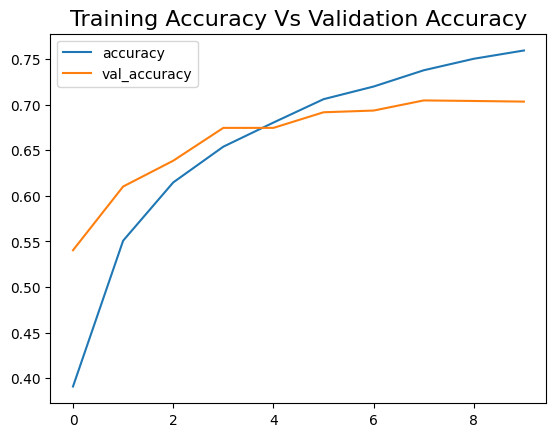

In [134]:
metrics[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy Vs Validation Accuracy', fontsize=16)
plt.show()

In [136]:
model.evaluate(x_test,y_cat_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6999 - loss: 0.8860


[0.8902641534805298, 0.6978999972343445]

In [137]:
from sklearn.metrics import classification_report, confusion_matrix

In [138]:
#predictions = model.predict_classes(x_test)
predictions = np.argmax(model.predict(x_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


In [139]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      0.79      0.74      1000
           1       0.78      0.87      0.82      1000
           2       0.58      0.58      0.58      1000
           3       0.52      0.52      0.52      1000
           4       0.65      0.60      0.63      1000
           5       0.66      0.54      0.60      1000
           6       0.75      0.78      0.76      1000
           7       0.72      0.75      0.73      1000
           8       0.86      0.76      0.80      1000
           9       0.77      0.78      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



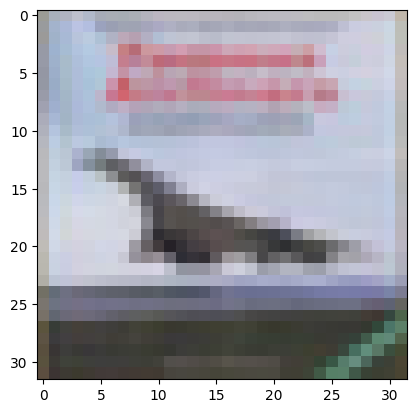

In [92]:
#taking a look at an image
plt.imshow(x_test[3])

In [94]:
#running the prediction on the image my_image which is an image out of x_test
my_image = x_test[3]
predicted_class = model.predict(my_image.reshape(1,32,32,3)).argmax()  # Get predicted class index
actual_class = y_test[3][0]

#printing the prediction stored in predicted_class as well as the actual class stored in actual_class
print("Predicted:", LABEL_NAMES[predicted_class])
print("Actual:", LABEL_NAMES[actual_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Predicted: airplane
Actual: airplane


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


array([[1.1834262e-05, 2.1395560e-04, 2.2743398e-02, 2.6444461e-02,
        4.0508563e-05, 9.4727886e-01, 8.9140644e-04, 1.9837948e-03,
        1.1069193e-04, 2.8108139e-04]], dtype=float32)